In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('temp', 'character_ids.tsv'), sep='\t')

df['age'] = 1700 - df.birth_date.str.split(' ', expand=True)[1].astype(int)

df

,id,faction_name,character_type,first_name,last_name,birth_date,path,cai_id,cai_resource_id,cai_path,army_id,cai_mobile_path,army_rec_type,army_path,age
0,580548184,austria,General,names_name_names_german_catholicPrince_Eugen,names_name_names_german_catholicvon_Savoyen,summer 1663,austria-General-0001.xml,5500,5501,0056.xml,580553432.0,0028.xml,ARMY,austria-0001.xml,37
1,580604080,austria,General,names_name_names_german_catholicGuido,names_name_names_german_catholicvon_Starhemberg,summer 1657,austria-General-0002.xml,5527,5528,0065.xml,580608152.0,0034.xml,ARMY,austria-0004.xml,43
2,580621280,austria,General,names_name_names_german_catholicLudwig,names_name_names_german_catholicvon_Baden-Baden,summer 1655,austria-General-0003.xml,5535,5536,0068.xml,580626024.0,0035.xml,ARMY,austria-0005.xml,45
3,580579800,austria,catholic_missionary,names_name_names_german_catholicAbraham,names_name_names_german_catholica_Sancta_Clara,summer 1644,austria-catholic_missionary-0001.xml,5517,5518,0060.xml,0.0,0031.xml,NaN,NaN,56
4,580566728,austria,colonel,names_name_names_german_catholicSimon,names_name_names_german_catholicSeitz,summer 1682,austria-colonel-0001.xml,5511,5512,0059.xml,580569584.0,0030.xml,ARMY,austria-0002.xml,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,590061288,wurttemberg,minister,names_name_names_german_catholicFranz,names_name_names_german_catholicHuber,summer 1678,wurttemberg-minister-0010.xml,6732,0,0687.xml,NaN,NaN,NaN,NaN,22
784,590063264,wurttemberg,minister,names_name_names_german_catholicGottlieb,names_name_names_german_catholicKühl,summer 1658,wurttemberg-minister-0011.xml,6733,0,0688.xml,NaN,NaN,NaN,NaN,42
785,590065328,wurttemberg,minister,names_name_names_german_catholicEhregott,names_name_names_german_catholicDohm,summer 1662,wurttemberg-minister-0012.xml,6734,0,0689.xml,NaN,NaN,NaN,NaN,38
786,590067304,wurttemberg,minister,names_name_names_german_catholicFranz,names_name_names_german_catholicCreuzer,summer 1668,wurttemberg-minister-0013.xml,6735,0,0690.xml,NaN,NaN,NaN,NaN,32


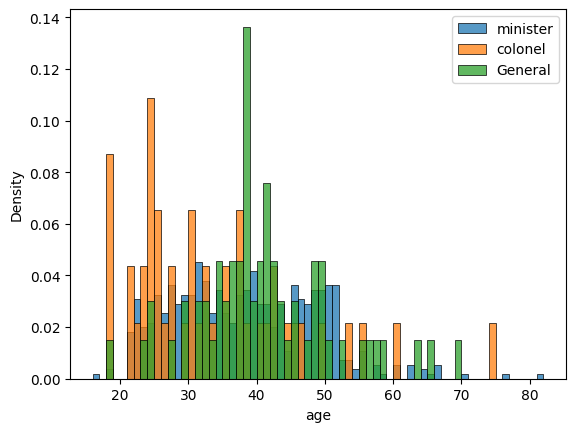

In [3]:
sns.histplot(data=df[df.character_type == 'minister'], x='age', binwidth=1, stat='density', label='minister')
sns.histplot(data=df[df.character_type == 'colonel'], x='age', binwidth=1, stat='density', label='colonel')
sns.histplot(data=df[df.character_type == 'General'], x='age', binwidth=1, stat='density', label='General')
plt.legend()
plt.show()

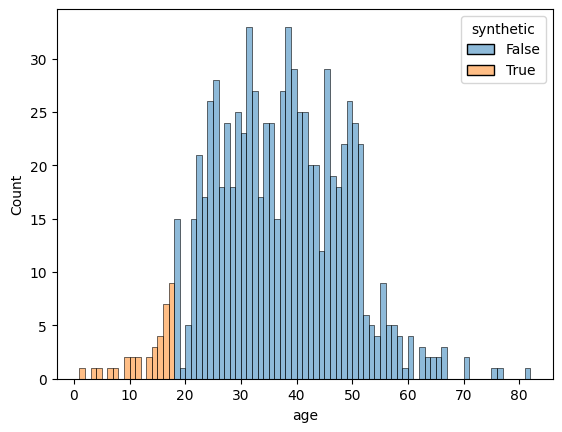

Fitted Gamma distribution
fit_alpha: 131.89287086982398
fit_loc  : -98.17321177602771
fit_beta : 1.0195464028818084


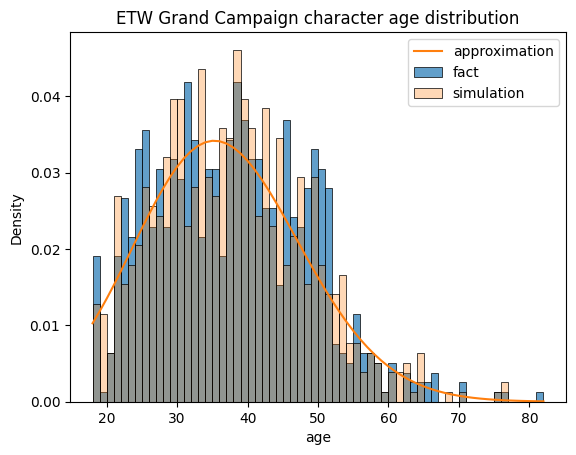

In [4]:
data = df.age.copy()

data = pd.concat([
    data,
    pd.Series(
        [1] * 1 +
        [2] * 0 +
        [3] * 1 +
        [4] * 1 +
        [5] * 0 +
        [6] * 1 +
        [7] * 1 +
        [8] * 0 +
        [9] * 2 +
        [10] * 2 +
        [11] * 2 +
        [12] * 0 +
        [13] * 2 +
        [14] * 3 +
        [15] * 4 +
        [16] * 6 +
        [17] * 9,
        name='age')
], ignore_index=True)

sns.histplot(data=pd.DataFrame({'age': data, 'synthetic': data < 18}), x='age', binwidth=1, hue='synthetic')
plt.show()

fit_alpha, fit_loc, fit_beta = stats.gamma.fit(data)
simulation = stats.gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=data.size).round()

print('Fitted Gamma distribution')
print(f'fit_alpha: {fit_alpha}')
print(f'fit_loc  : {fit_loc}')
print(f'fit_beta : {fit_beta}')

x_pdf = np.arange(18, 83, 1)
y_pdf = stats.gamma.pdf(x_pdf, fit_alpha, loc=fit_loc, scale=fit_beta)

sns.histplot(x=data[data >= 18], binwidth=1, stat='density', label='fact', alpha=0.7)
sns.lineplot(x=x_pdf, y=y_pdf, color='C1', label='approximation')
sns.histplot(x=simulation[simulation >= 18], binwidth=1, stat='density', label='simulation', alpha=0.3)
plt.legend()
plt.title('ETW Grand Campaign character age distribution')
plt.show()